In [2]:
#Kaggle: House pricing (Getting started-competition)

In [125]:
#Import all libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from scipy.stats import norm,skew
import warnings
import math

In [4]:
#Load train and test dataset file into variable

train = pd.read_csv("C:/Users/44793/OneDrive/Desktop/house-prices-advanced-regression-techniques/train.csv", header = 0)
test = pd.read_csv("C:/Users/44793/OneDrive/Desktop/house-prices-advanced-regression-techniques/test.csv", header = 0)

#Add this option to see the whole dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Drop any unrequired column data for independent variable
trains = train.drop('Id',axis = 1) 

In [8]:
trains

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL          NaN     8544   Pave   NaN      IR1   
32            20       RL         85.0    11049   Pave   NaN      Reg   
33            20       RL         70.0    10552   Pave   NaN      IR1   
34           120       RL         60.0     7313   Pave   NaN      Reg   
35            60       RL        108.0    13418   Pave   NaN      Reg   
36            20       RL        112.0    10859   Pave   NaN      Reg   
37            20       RL         74.0     8532   Pave   NaN      Reg   
38            20       RL         68.0     7922   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
40            20       RL         84.0     8658   Pave   NaN      Reg   
41            20       RL        115.0    16905   Pave   NaN      Reg   
42            85       RL          NaN     9180   Pave   NaN      IR1   
43            20       RL          NaN     9200   Pave   NaN      IR1   
44            20       RL         70.0     7945   Pave   NaN      Reg   
45           120       RL         61.0     7658   Pave   NaN      Reg   
46            50       RL         48.0    12822   Pave   NaN      IR1   
47            20       FV         84.0    11096   Pave   NaN      Reg   
48           190       RM         33.0     4456   Pave   NaN      Reg   
49            20       RL         66.0     7742   Pave   NaN      Reg   
50            60       RL          NaN    13869   Pave   NaN      IR2   
51            50       RM         52.0     6240   Pave   NaN      Reg   
52            90       RM        110.0     8472   Grvl   NaN      IR2   
53            20       RL         68.0    50271   Pave   NaN    

In [10]:
trains.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [11]:
#Analyse target SalesPrice column
trains['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

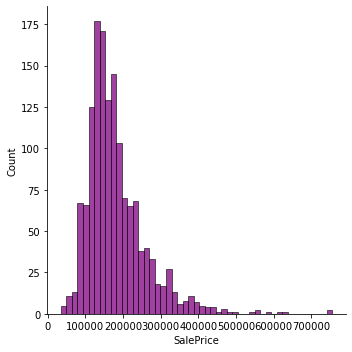

In [12]:
#huge difference in mean and median
#huge difference between upperquartile and max value
sns.displot(trains['SalePrice'], color = 'purple')

In [13]:
#SalePrice data has a positive skew
print('Skewness: {}'.format(trains['SalePrice'].skew()))
print('Kurtosis: {}'.format(trains['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


0.12134661989685333
0.809519155707878


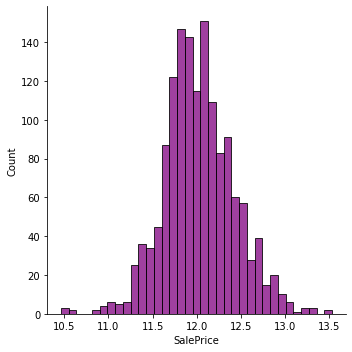

In [63]:
#To fix the positve skewness apply some type of transformation on data 
# to make it normal
#take log or square root for moderate right skewness

#sqr root transformation
#trains['SalePrice'] = np.sqrt(train['SalePrice'])
#sns.displot(trains['SalePrice'],  color = 'purple');
#print(trains['SalePrice'].skew())
#print(trains['SalePrice'].kurt())

#logarithmic transormation
trains['SalePrice'] = np.log1p(train['SalePrice'])
sns.displot(trains['SalePrice'],  color = 'purple');
print(trains['SalePrice'].skew())
print(trains['SalePrice'].kurt())

#logarithmic has more normal skewness and kurtosis

<AxesSubplot:>

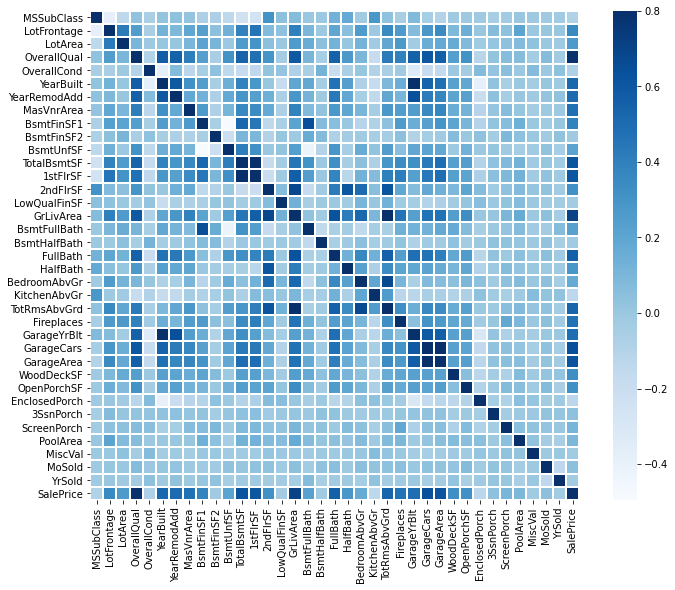

In [32]:
#Identify the most important features effecting house prices
#use a correlation map
corrmat = trains.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square=True, cmap= 'Blues', linewidth=1)
#cmap = Blues is nice
#annotate heatmap - add parameter annot = True
#fmt parameter state decimal places u want in annotations fmt = ".0f" means 0 decimal places<this change to integer
#annot_kws = {} <accept argument in curlybrace for the annotation eg. can increase font size by adding >'fontsize': 6 to {}, 'fontweight':'bold'

#put line between rectangle - linewidth = 1 <no how wide lines are.
#change line color - linecolor = 'black'
#if want to use own created labels(in a list) rather than ones from PANDA DATAFRAME
#pass to xticklabels = variablewlabelname and yticklabel=samething
#square=True make heatmap w perfect square


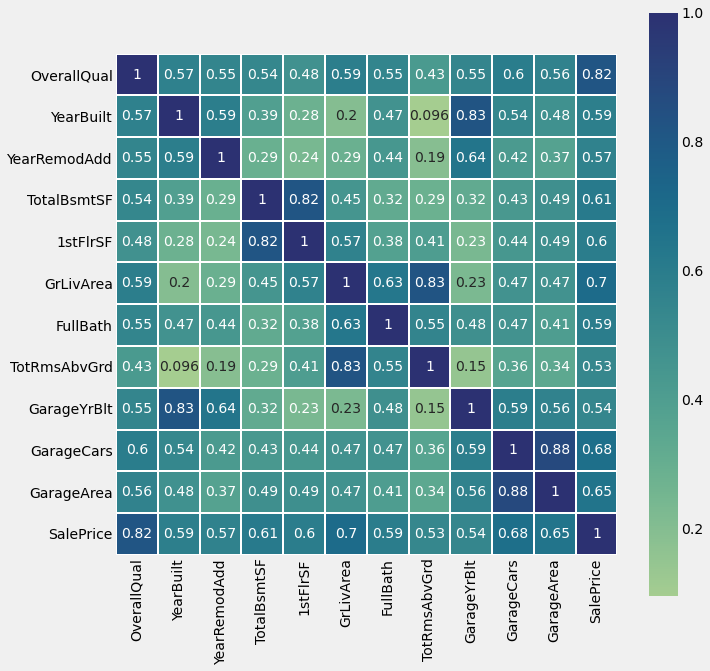

In [91]:
corr=trains.corr()
#corr.index[0] - returns variable corresponding to that index

#abs() <pass in corr['SalePrice'] <will return ABSOLUTE VALUE OF CORRELATIONS
#WITH SalePrice
abs(corr['SalePrice'])

#return T/F where abs value of corr w saleprice >0.5
abs(corr['SalePrice'])>0.5

plt.style.use("fivethirtyeight")
#this returns a list of STRINGS of all features with a correlation greater than 0.5.
corr.index[abs(corr['SalePrice'])>0.5]

#variable takes the list of featuers
highest_corr_features = corr.index[abs(corr['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
g=sns.heatmap(trains[highest_corr_features].corr(), 
              square=True,
              linewidth=1,
              annot=True,cmap="crest")
#'RdYlGn' - a nice color

* 'OverQual' - top highest correlation = 0.79
* 'GarageCars' & 'GarageArea' are redundant (correlation between them is 0.88)
* 'TotalBsmtSF' '1stFlrSF' are also redundant (correlation between them is 0.82)
* 'TotRmsAbvGrd' & 'GrLivArea' also have a strong correlation of 0.83. keep  'GrLivArea' as it correlationw ith SalePrice = higher

In [61]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

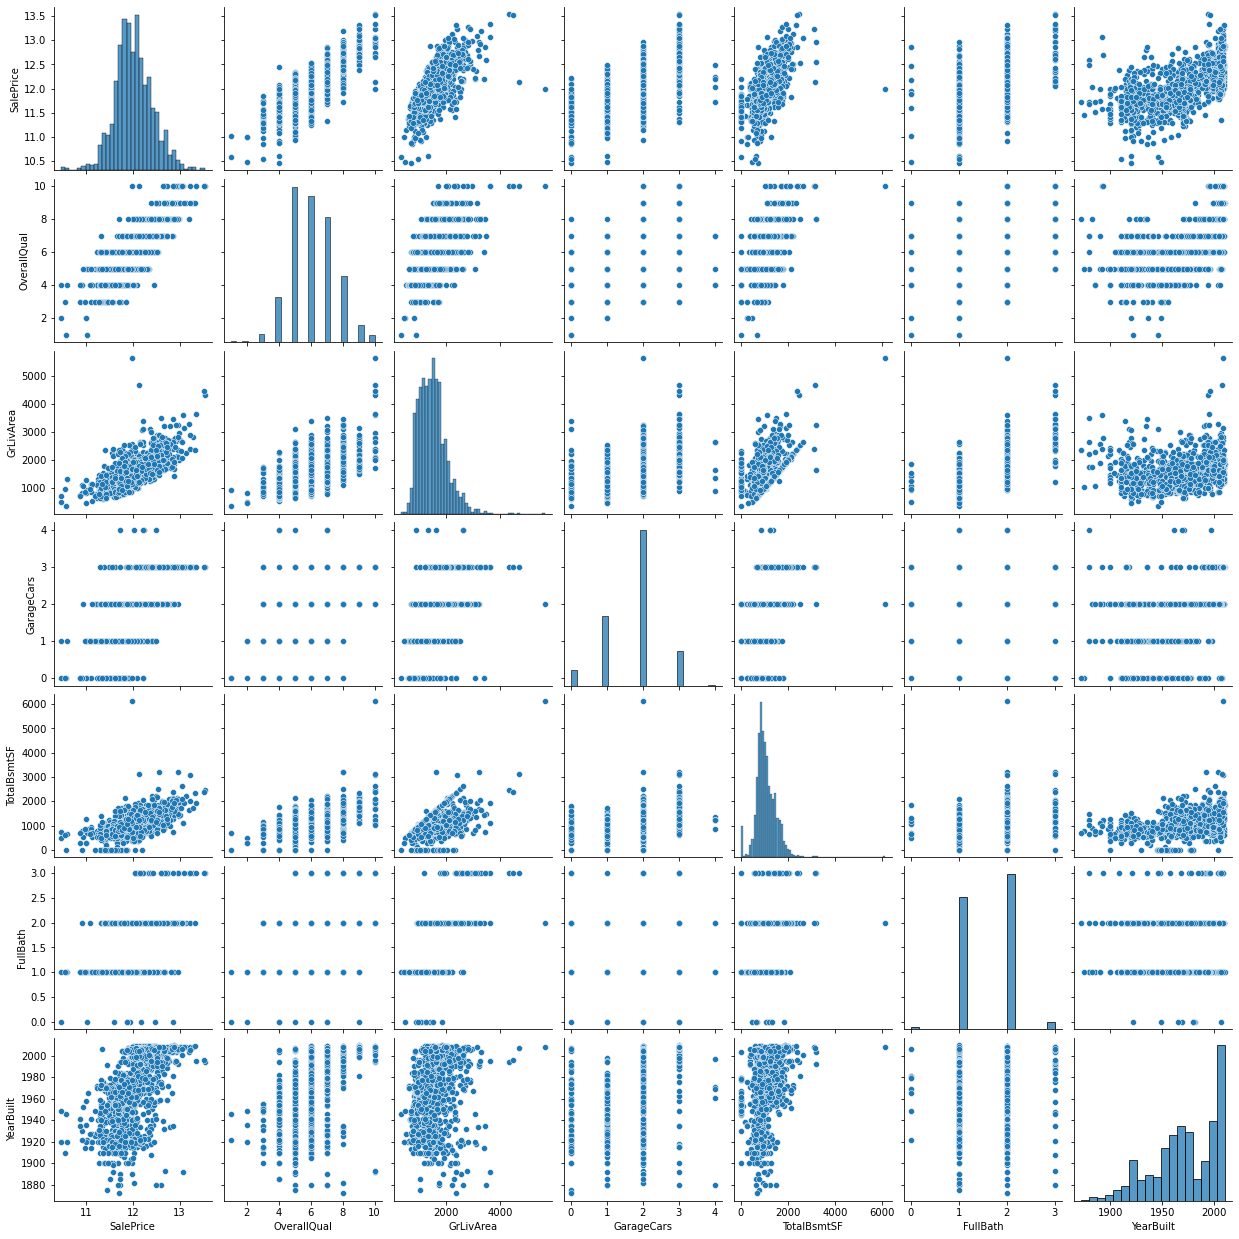

In [64]:
#Features with highest correlation
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(trains[cols])

In [95]:
#Before looking for missing data: concatanate train and test datasets,preprocess
#and divide them again

y_train = trains['SalePrice']
test_id = test['Id']
all_data = pd.concat([trains,test],axis=0,sort=False)
all_data = all_data.drop(['Id','SalePrice'],axis=1)

In [96]:
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(25)

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343

In [71]:
all_data.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

In [81]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they ar

In [87]:
#from IPython.display import IFrame

In [86]:
#wiki = IFrame(src='https://medicalfuturist.com/top-artificial-intelligence-companies-in-healthcare/',width=1000,height=400)
#display(wiki)

#### Missing data:
##### LotFrontage, MasVnrArea,GarageYrBlt  

#### Identifying outliers/skewness:
###### LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF?, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscValue

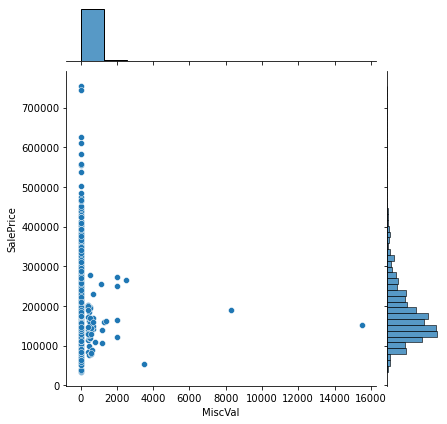

In [40]:
sns.jointplot(x ='MiscVal' , y = 'SalePrice', data = df)

In [51]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [97]:
#featires with missing value are not important as they dont have a 
#correlation greater than >0.5 
#wont miss any data if we delete.

all_data.drop((missing_data[missing_data['Total']>5]).index,axis=1,inplace=True)

print(all_data.isnull().sum().max())

4


In [100]:
#show features and number of missing values
total = all_data.isna().sum().sort_values(ascending=False)
total.head(19)

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
Exterior2nd     1
SaleType        1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
Electrical      1
YearBuilt       0
ExterQual       0
RoofMatl        0
dtype: int64

In [101]:
#Filling the numeric data
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

#value for missing data should be a 0 eg. 0 garage cars.
for feature in numeric_missed:
    all_data[feature]=all_data[feature].fillna(0)

In [103]:
#filling the categorical data
categorical_missed= ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature]=all_data[feature].fillna(all_data[feature].mode()[0])

In [104]:
#fill in remaning missing values with values that are common in this feature
all_data['Functional']=all_data['Functional'].fillna('Typ')

In [105]:
all_data.drop('Utilities',axis=1,inplace=True)

In [106]:
all_data.isnull().sum().max()

0

In [127]:
#FEATURE ENGINEERING
#FIX THE SKEWNESS IN OTHER FEATURES

#all_data.dtypes - returns list of all columns+dtypes
#this will return all datatypes that dont equal object
#using .index method will return an index object of th ecolumns
numeric_feats=all_data.dtypes[all_data.dtypes != 'object'].index

#numeric_feats - are all int/float

#apply the skew function to all numerical features using LAMBDA, sort values
skewed_feats =all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

#store skewed features with skew greater than 0.5 in variable
high_skew = skewed_feats[abs(skewed_feats)>0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [129]:
#loop through index object of the features
#and transform it using a logarithmic to reduce skewness
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

In [148]:
all_data[numeric_feats].skew().sort_values(ascending=False)
#all_data[numeric_feats].dtypes

PoolArea         14.893653
3SsnPorch         8.746268
LowQualFinSF      8.414667
MiscVal           5.068693
BsmtHalfBath      3.739771
ScreenPorch       2.923425
BsmtFinSF2        2.383255
KitchenAbvGr      2.243372
EnclosedPorch     1.904119
HalfBath          0.553848
BsmtFullBath      0.380569
BedroomAbvGr      0.326492
2ndFlrSF          0.292030
GarageArea        0.239380
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
WoodDeckSF        0.105023
MSSubClass        0.090496
Fireplaces        0.090435
1stFlrSF         -0.064301
GrLivArea        -0.118123
OpenPorchSF      -0.176280
TotRmsAbvGrd     -0.212944
GarageCars       -0.219694
YearRemodAdd     -0.451252
YearBuilt        -0.629647
BsmtFinSF1       -0.732341
LotArea          -0.893911
OverallCond      -1.691232
BsmtUnfSF        -2.789417
TotalBsmtSF      -5.653074
dtype: float64

In [149]:
#Add a new feature
# to concatanate 3 redundant features - TotalBsmtSF,1stFlrSF, 2ndFlrSF
all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [152]:
#Converting Categorical to numerical
all_data = pd.get_dummies(all_data)
all_data.head()
#all_data.shape

(2919, 219)

In [153]:
#Cleaned data well
#seperate data again to test, and training set
x_train = all_data[:len(y_train)]
x_test = all_data[len(y_train):]

In [154]:
x_train.shape, x_test.shape

((1460, 219), (1459, 219))

In [155]:
#Machine Learning model
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better=False)

def rmse_CV_train(model):
    kf=KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model,x_train,y_train,
                                   scoring="neg_mean_squared_error",cv=kf))
    return (rmse)

def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(trains.values)
    rmse = np.sqrt(-cross_val_score(model,x_test,y_test,
                                   scoring="neg_mean_squared_error",cv=kf))
    return (rmse)

In [156]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)

the_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [157]:
y_predict = np.floor(np.expm1(the_model.predict(x_test)))
y_predict

array([122632., 159231., 187972., ..., 167571., 119095., 214670.],
      dtype=float32)

In [159]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission.csv',index=False)